In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data preparation

In [3]:
df = pd.read_csv("datatraining.txt")

In [4]:
df['date']= pd.to_datetime(df['date']) 
df.set_index('date')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1
2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1
2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1
2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1
2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1
2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1
2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1
2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1
2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1


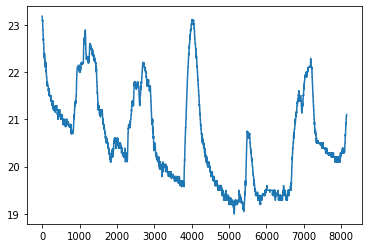

In [5]:
ts1 = df['Temperature']
plt.plot(ts1)
plt.show()

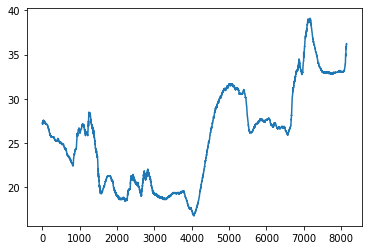

In [6]:
ts2 = df['Humidity']
plt.plot(ts2)
plt.show()

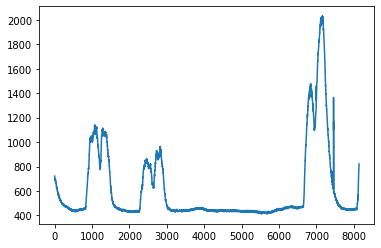

In [7]:
ts3 = df['CO2']
plt.plot(ts3)
plt.show()

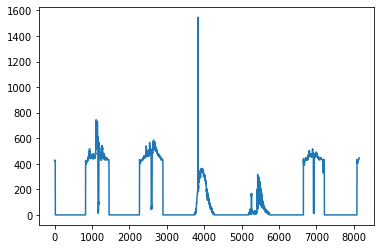

In [8]:
ts4 = df['Light']
plt.plot(ts4)
plt.show()

# Transformations

In [9]:
#Le time series più simili tra loro sono quelle relative light e temperature, dato il numero e l'intensità dei picchi.
#Su queste andrò ad effettuare le trasformazioni per renderle confrontabili.

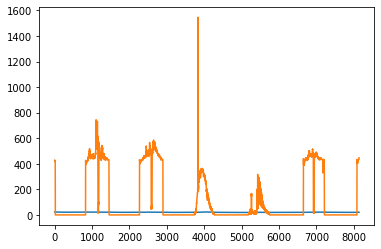

In [10]:
plt.plot(ts1)
plt.plot(ts4)
plt.show()

## Offset translation

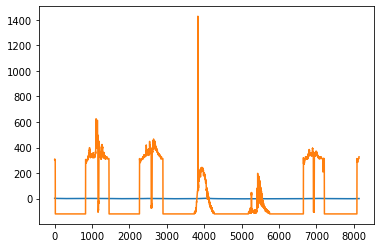

In [11]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts4 - ts4.mean())
plt.show()

## Ammplitude scaling

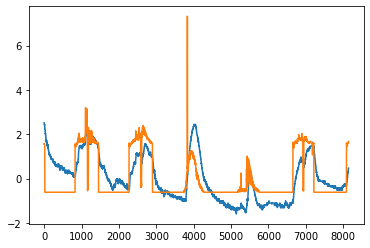

In [12]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts4 - ts4.mean())/ts4.std())
plt.show()

## Noise smoothing

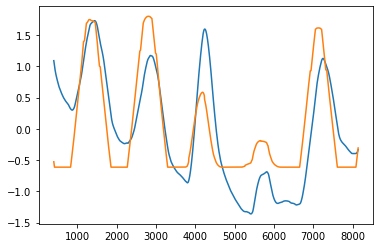

In [13]:
w = 400
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts4 - ts4.mean())/ts4.std()).rolling(window=w).mean())
plt.show()

## Trend removal

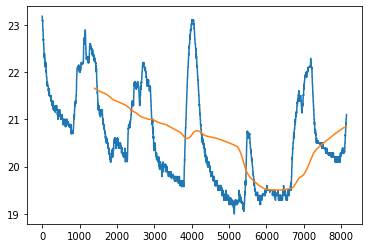

In [14]:
plt.plot(ts1)
plt.plot(ts1.rolling(window=1400).mean())
plt.show()

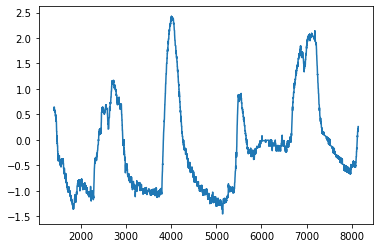

In [15]:
ts_shift1 = ts1 - ts1.rolling(window=1400).mean()
plt.plot(ts_shift1)
plt.show()

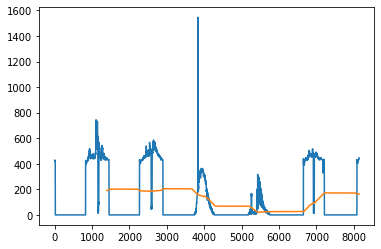

In [21]:
plt.plot(ts4)
plt.plot(ts4.rolling(window=1400).mean())
plt.show()

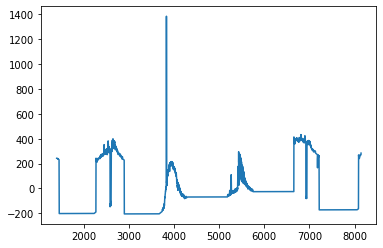

In [22]:
ts_shift2 = ts4 - ts4.rolling(window=1400).mean()
plt.plot(ts_shift2)
plt.show()

# Euclidean distance

In [16]:
#effettuo il confronto tra ts1 e ts2 (dato che sono le piu simili)?

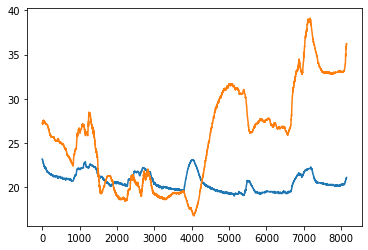

In [17]:
plt.plot(ts1)
plt.plot(ts2)
plt.show()

In [18]:
from scipy.spatial.distance import euclidean

In [19]:
dist = euclidean(ts1, ts2)
dist

695.2232842010035

# Manhattan distance

In [20]:
from scipy.spatial.distance import cityblock

In [21]:
dist = cityblock(ts1, ts2)
dist

49510.54875

# Dynamic Time Warping

In [22]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [36]:
dist = dtw(ts1, ts2)
dist

596.9391813387645

In [43]:
dist = dtw(ts1[:3500], ts2[:3500])
dist

113.05066278750543

In [38]:
path, dist = dtw_path(ts1[:100], ts2[:100])

In [39]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43),
 (44, 44),
 (45, 45),
 (46, 46),
 (47, 47),
 (48, 48),
 (49, 49),
 (50, 50),
 (51, 51),
 (52, 52),
 (53, 53),
 (54, 54),
 (55, 55),
 (56, 56),
 (57, 57),
 (58, 58),
 (59, 59),
 (60, 60),
 (61, 61),
 (62, 62),
 (63, 63),
 (64, 64),
 (65, 65),
 (66, 66),
 (67, 67),
 (68, 68),
 (69, 69),
 (70, 70),
 (71, 71),
 (72, 72),
 (73, 73),
 (74, 74),
 (75, 75),
 (76, 76),
 (77, 77),
 (78, 78),
 (79, 79),
 (80, 80),
 (81, 81),
 (82, 82),
 (83, 83),
 (84, 84),
 (85, 85),
 (86, 86),
 (87, 87),
 (88, 88),
 (89, 89),
 (90, 90),
 (91, 91),
 (92, 92

In [40]:
from scipy.spatial.distance import cdist

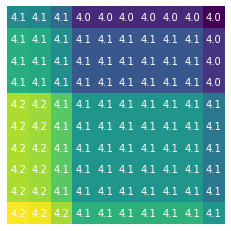

In [46]:
mat = cdist(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

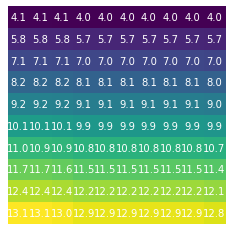

In [47]:
acc = subsequence_cost_matrix(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

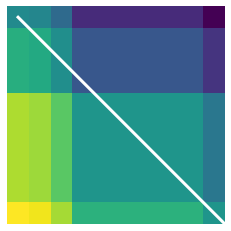

In [48]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [49]:
path, dist = dtw_path(ts1[:10], ts2[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

12.951053827777873

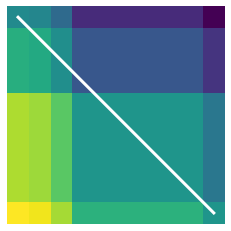

In [50]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [51]:
path, dist = dtw_path(ts1[:10], ts2[:10], global_constraint="itakura", itakura_max_slope=2.)
dist

12.951053827777873

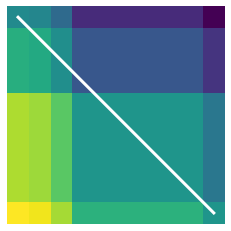

In [52]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [54]:
cdist_dtw([ts1, ts2, ts3])

array([[    0.        ,   596.93918134, 59975.68559078],
       [  596.93918134,     0.        , 59491.48357238],
       [59975.68559078, 59491.48357238,     0.        ]])

# DTW 2

# Features extraction

In [1]:
import numpy as np
import scipy.stats as stats

In [23]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [25]:
features = calculate_features(ts1)

In [26]:
features

{'avg': 20.61908364034621,
 'std': 1.0168539980465523,
 'var': 1.0339920533432578,
 'med': 20.39,
 '10p': 19.39,
 '25p': 19.7,
 '50p': 20.39,
 '75p': 21.39,
 '90p': 22.1,
 'iqr': 1.6900000000000013,
 'cov': 20.27732956742749,
 'skw': 0.4507854277580048,
 'kur': -0.8104818088673884}

In [28]:
from tsfresh.feature_extraction import extract_features

ModuleNotFoundError: No module named 'tsfresh'